In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

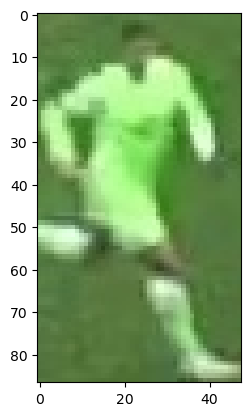

In [3]:
plt.imshow(image)

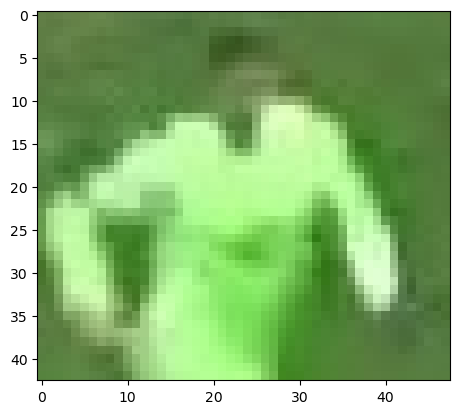

In [5]:
# Take the top half of the image (that is where the jersey is)
top_half_image = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half_image)

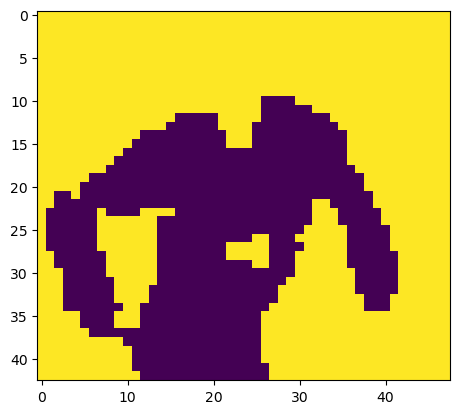

In [9]:
# Cluster the image into 2 clusters

## Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

## Cluster the image
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

## Get the labels
labels = kmeans.labels_

## Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

## Display the clustered image
plt.imshow(clustered_image)

In [10]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key = corner_cluster.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 if non_player_cluster == 0 else 0
print(player_cluster)

0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([171.        , 235.38389262, 142.37718121])